# Principal Components Analysis (PCA)

Fall 2022: Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng(123)

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

# When there's lots of variables

Suppose we have a bunch of data, like
$$ 
\begin{bmatrix}
X_{11} & X_{12} & \cdots & X_{1k} \\
X_{21} & X_{22} & \cdots & X_{2k}\\
\vdots & \vdots & \ddots & \vdots \\
X_{n1} & \cdots & \cdots &X_{nk}
\end{bmatrix}
$$
where
$$\begin{aligned}
    X_{i \cdot} &= \text{(one observation)} \\
    X_{\cdot j} &= \text{(one variable)} .
\end{aligned}$$

How do we "look" at it?
First, we look at all the variables separately and in pairs.
... what next?

One way to look at this is that we have $n$ points in $\mathbb{R}^k$.

Then, PCA answers the question:
"What are the most important axes of variation
(of the data in $\mathbb{R}^k$)?"

# Manatee Morphometrics

Manatees come in different shapes and sizes.
In our morphometric study of manatees,
we will take 20 different measurements from each of 250 manatees:
head length, tail width, nostril spacing, belly diamter, etcetera.
Here's a rough model of the data:

- some manatees are bigger than others; this underlying "size" affects all variables roughly equally
- there are average shape differences between sexes in some variables

So, we'll:

1. choose the mean female minus male difference for each variable
2. generate the sex and relative size of each manatee
3. generate all measurements from independent Normals, adjusted by sex and size

In [2]:
k = 20
n = 250
sexes = np.array(['f', 'm'])[1 * (rng.random(size=n) < 0.5)]
sizes = rng.normal(loc=1.0, scale=0.1, size=n)

mean_measurements = rng.gamma(shape=10, scale=10, size=k)
sex_diffs = np.sort(rng.normal(loc=10, scale=10, size=k)) # female minus male
sd_measurements = 20

X = rng.normal(loc=mean_measurements, scale=sd_measurements, size=(n, k))
X[sexes == 'f', :] += sex_diffs
X *= sizes[:, np.newaxis]

What'd we just do?
$$\begin{aligned}
    \mu_j &= \text{(mean male minus female difference for variable $j$)} \\
    S_i &= \text{("size" of manatee $i$)} \\
        &\sim \text{Normal}(\text{mean}=1, \text{sd}=0.1) \\
    F_i &= \begin{cases}
        1 \qquad &\text{if manatee $i$ is female} \\
        0 \qquad &\text{otherwise}
    \end{cases} \\
    \epsilon_{ij} &\sim \text{Normal}(\mu_j, \sigma) \\
    X_{ij} &= \text{(measurement $j$ for manatee $i$)} \\
        &= S_i \left( Z_ij + \mu_j F_i + \epsilon_{ij} \right) .
\end{aligned}$$

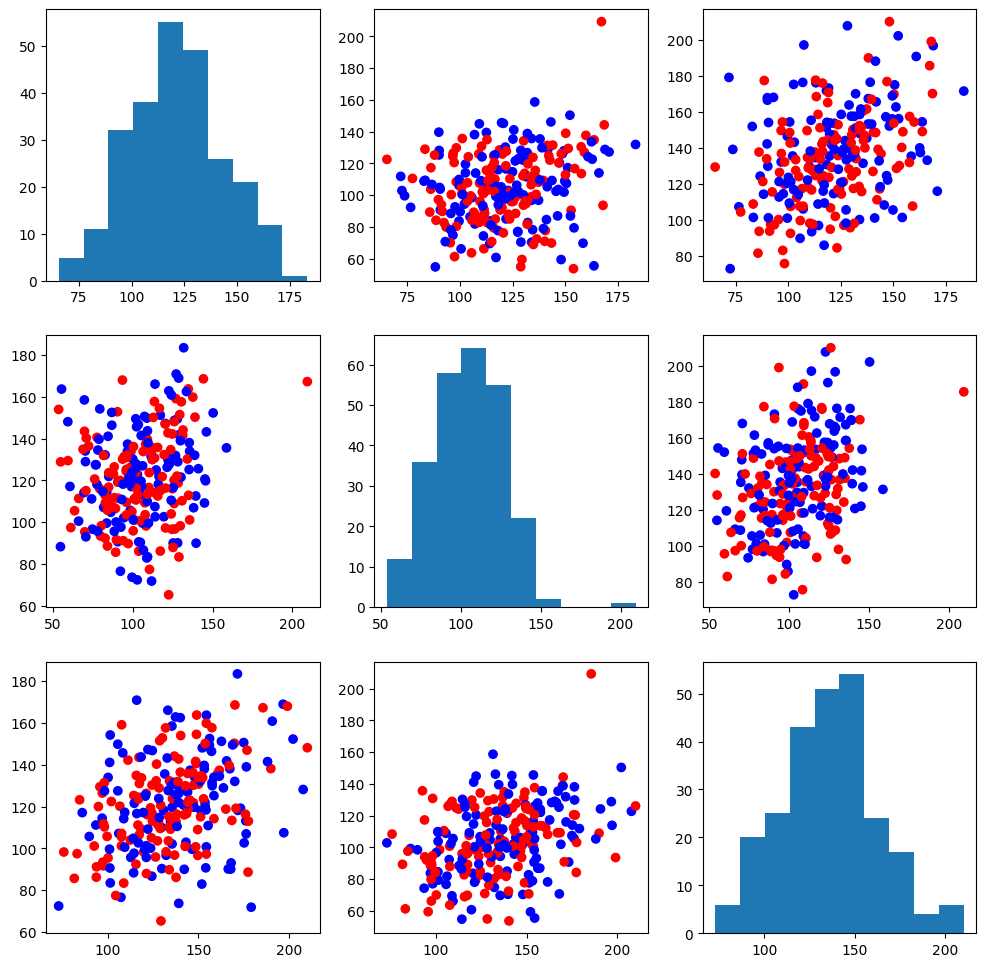

In [3]:
colors = np.array(['r', 'b'])[1 * (sexes == 'f')]
fig, axes = plt.subplots(3, 3, figsize=(12,12))
for i in range(3):
    for j in range(3):
        ax = axes[i][j]
        if i == j:
            ax.hist(X[:,i])
        else:
            ax.scatter(X[:,i], X[:,j], c=colors)

First, we do PCA:

In [4]:
covmat = np.cov(X.T)
evals, evecs = np.linalg.eig(covmat)
eord = np.argsort(evals)[::-1]
evals = evals[eord]
evecs = evecs[:,eord]
pcs = X.dot(evecs)

## Scree plot

<div style="float: right; width: 40%;">
<img src="images/scree.png" alt="scree slope in the mountains">
</div>


Larger eigenvalues are more important (in a way we'll explain later).
It turns out that the eigenvalue, squared, is proportional to
"the percent variation explained" by the corresponding PC.
Plotting these is referred as a "scree plot".

**Scree plot:**

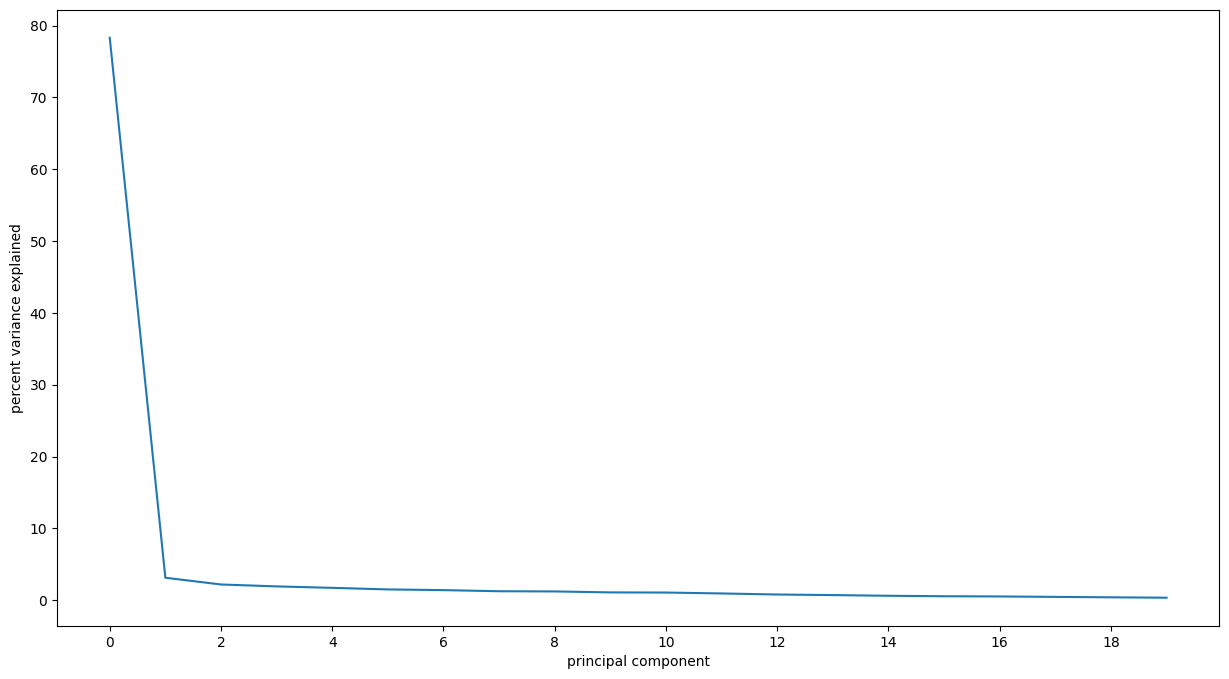

In [5]:
perc_var = 100 * evals**2 / np.sum(evals**2)
plt.plot(perc_var)
plt.xlabel("principal component")
plt.ylabel("percent variance explained")
plt.xticks(np.arange(0, 20, 2));

## Manatees in PC space

Here is a plot of the (projections of each manatee on to the)
first two principal components,
colored by sex of the manatee.

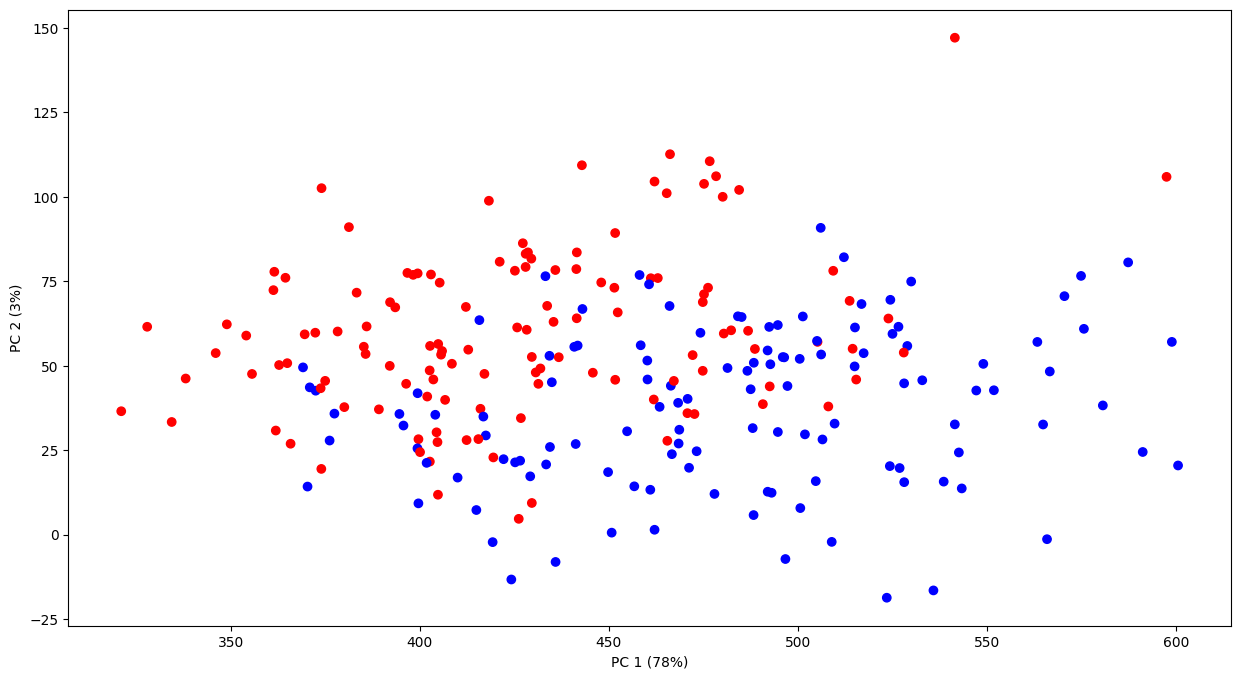

In [6]:
plt.scatter(pcs[:,0], pcs[:,1], c=np.array(['red', 'blue'])[1*(sexes == 'f')])
plt.xlabel(f"PC 1 ({perc_var[0]:.0f}%)"); plt.ylabel(f"PC 2 ({perc_var[1]:.0f}%)");

## How variables contribute to each PC

These are called the "loadings":

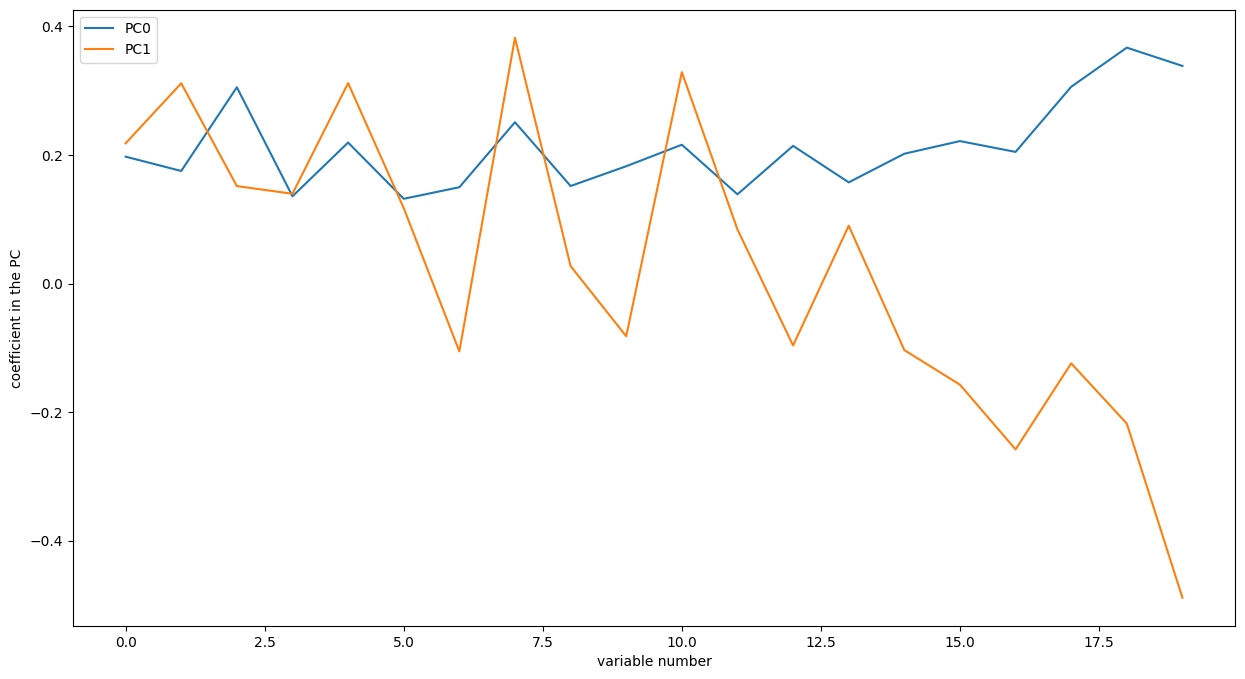

In [7]:
for k in np.arange(2):
    plt.plot(evecs[:, k], label=f"PC{k}")

plt.xlabel("variable number")
plt.ylabel("coefficient in the PC")
plt.legend();